# Usage and performance testing

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pysor import sor

## 1D case

fast:
10000 loops, best of 3: 126 µs per loop
naive:
10 loops, best of 3: 70.8 ms per loop


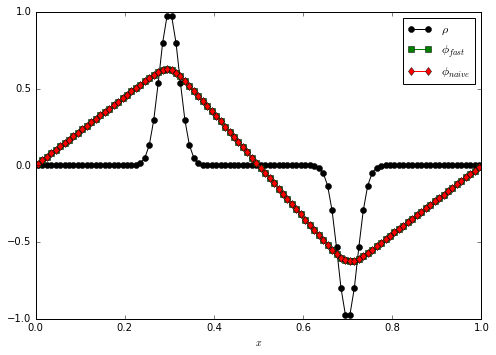

In [2]:
n = 100
g = np.linspace(0.0, 1.0, n, endpoint=False)
h = g[1] - g[0]
x = g + 0.5 * h
rho = np.exp((-1000.0) * (x - 0.3)**2) - np.exp((-1000.0) * (x - 0.7)**2)
rho -= rho.mean()

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(x, rho, '-o', color='black', label=r"$\rho$")
ax.plot(
    x, sor(rho, h, maxiter=100000, maxerr=1.0E-12, fast=True),
    '-s', color='green', label=r"$\phi_{fast}$")
ax.plot(
    x, sor(rho, h, maxiter=100000, maxerr=1.0E-12, fast=False),
    '-d', color='red', label=r"$\phi_{naive}$")
ax.set_xlabel(r"$x$")
ax.legend(loc=0)
fig.tight_layout()

print("fast:")
%timeit sor(rho, h, maxiter=100000, maxerr=1.0E-12, fast=True)
print("naive:")
%timeit sor(rho, h, maxiter=100000, maxerr=1.0E-12, fast=False)

## 2D case

fast:
100 loops, best of 3: 16.5 ms per loop
naive:
1 loop, best of 3: 6.39 s per loop


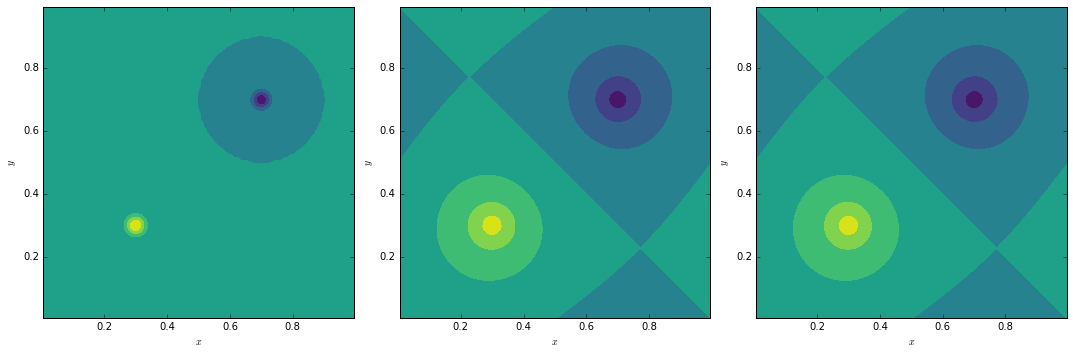

In [3]:
n = 100
g = np.linspace(0.0, 1.0, n, endpoint=False)
h = g[1] - g[0]
g += 0.5 * h
x, y = np.meshgrid(g, g, indexing="xy")
rho = np.exp((-1000.0) * ((x - 0.3)**2 + (y - 0.3)**2)) -\
    np.exp((-1000.0) * ((x - 0.7)**2 + (y - 0.7)**2))
rho -= rho.mean()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].contourf(
    x, y, rho,
    cmap=mpl.cm.viridis)
axes[1].contourf(
    x, y, sor(rho, h, maxiter=100000, maxerr=1.0E-12, fast=True),
    cmap=mpl.cm.viridis)
axes[2].contourf(
    x, y, sor(rho, h, maxiter=100000, maxerr=1.0E-12, fast=False),
    cmap=mpl.cm.viridis)
for ax in axes.flat:
    ax.set_aspect("equal")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
fig.tight_layout()

print("fast:")
%timeit sor(rho, h, maxiter=100000, maxerr=1.0E-12, fast=True)
print("naive:")
%timeit sor(rho, h, maxiter=100000, maxerr=1.0E-12, fast=False)

## 3D case

fast, small:
1000 loops, best of 3: 556 µs per loop
naive, small:
1 loop, best of 3: 275 ms per loop


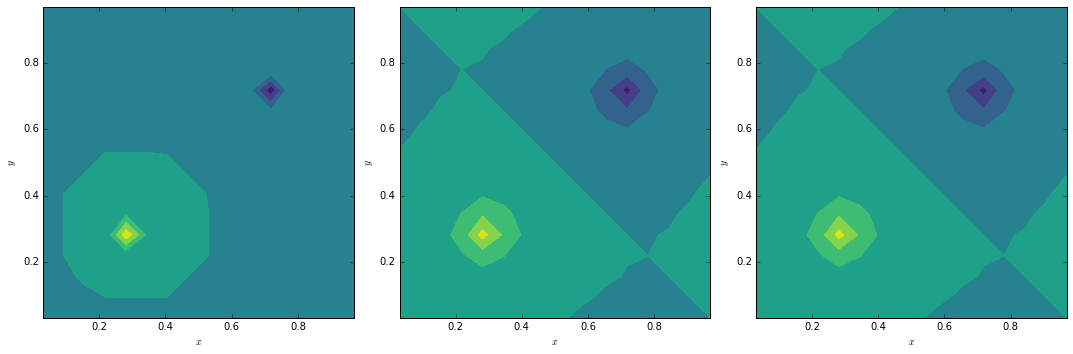

In [4]:
n = 16
g = np.linspace(0.0, 1.0, n, endpoint=False)
h = g[1] - g[0]
g += 0.5 * h
x, y, z = np.meshgrid(g, g, g, indexing="xy")
rho = np.exp((-1000.0) * ((x - 0.3)**2 + (y - 0.3)**2 + (z - 0.5)**2)) -\
    np.exp((-1000.0) * ((x - 0.7)**2 + (y - 0.7)**2 + (z - 0.5)**2))
rho -= rho.mean()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].contourf(
    x[:, :, n / 2], y[:, :, n / 2],
    rho[:, :, n / 2],
    cmap=mpl.cm.viridis)
axes[1].contourf(
    x[:, :, n / 2], y[:, :, n / 2],
    sor(rho, h, maxiter=100000, maxerr=1.0E-12, fast=True)[:, :, n / 2],
    cmap=mpl.cm.viridis)
axes[2].contourf(
    x[:, :, n / 2], y[:, :, n / 2],
    sor(rho, h, maxiter=100000, maxerr=1.0E-12, fast=False)[:, :, n / 2],
    cmap=mpl.cm.viridis)
for ax in axes.flat:
    ax.set_aspect("equal")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
fig.tight_layout()

print("fast, small:")
%timeit sor(rho, h, maxiter=100000, maxerr=1.0E-12, fast=True)
print("naive, small:")
%timeit sor(rho, h, maxiter=100000, maxerr=1.0E-12, fast=False)

fast, big:
1 loop, best of 3: 604 ms per loop


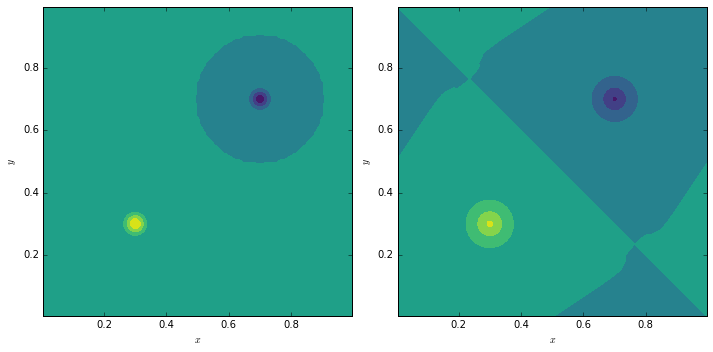

In [5]:
n = 100
g = np.linspace(0.0, 1.0, n, endpoint=False)
h = g[1] - g[0]
g += 0.5 * h
x, y, z = np.meshgrid(g, g, g, indexing="xy")
rho = np.exp((-1000.0) * ((x - 0.3)**2 + (y - 0.3)**2 + (z - 0.5)**2)) -\
    np.exp((-1000.0) * ((x - 0.7)**2 + (y - 0.7)**2 + (z - 0.5)**2))
rho -= rho.mean()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].contourf(
    x[:, :, n / 2], y[:, :, n / 2],
    rho[:, :, n / 2],
    cmap=mpl.cm.viridis)
axes[1].contourf(
    x[:, :, n / 2], y[:, :, n / 2],
    sor(rho, h, maxiter=100000, maxerr=1.0E-12, fast=True)[:, :, n / 2],
    cmap=mpl.cm.viridis)
for ax in axes.flat:
    ax.set_aspect("equal")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
fig.tight_layout()

print("fast, big:")
%timeit sor(rho, h, maxiter=100000, maxerr=1.0E-12, fast=True)